# Important Features

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Heat Stroke.csv")
df = df[df['Exertional (1) vs classic (0)'] == 0] # Classic only

In [4]:
variables = df.columns.drop(['Daily Ingested Water (L)', 'Exposure to sun', 'Sickle Cell Trait (SCT)', 'Rectal temperature (deg C)', 'Exertional (1) vs classic (0)', 'Barometric Pressure', 'Sweating', 'Skin color (flushed/normal=1, pale=0.5, cyatonic=0)', 'Strenuous exercise', 'Nationality', 'Sex', 'Hot/dry skin'])
new_df = df[variables] # Descarte de variables 

In [5]:
abs(df.corrwith(df['Heat stroke'])).sort_values(ascending=False)

c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Heat stroke                                            1.000000
Rectal temperature (deg C)                             0.961184
Patient temperature                                    0.741070
Exposure to sun                                        0.736153
Age                                                    0.573974
Strenuous exercise                                     0.566358
Diastolic BP                                           0.538106
Heat Index (HI)                                        0.530044
Environmental temperature (C)                          0.518831
Skin color (flushed/normal=1, pale=0.5, cyatonic=0)    0.513671
Relative Humidity                                      0.483495
Hot/dry skin                                           0.427293
Nationality                                            0.369865
Sweating                                               0.332256
Dehydration                                            0.103164
Cardiovascular disease history          

In [6]:
correlations = abs(new_df.corrwith(df['Heat stroke'])).sort_values(ascending=False)
print(correlations.index)

Index(['Heat stroke', 'Patient temperature', 'Age', 'Diastolic BP',
       'Heat Index (HI)', 'Environmental temperature (C)', 'Relative Humidity',
       'Dehydration', 'Cardiovascular disease history', 'Time of year (month)',
       'BMI', 'Heart / Pulse rate (b/min)', 'Time of day', 'Systolic BP',
       'Weight (kg)'],
      dtype='object')


In [7]:
features = ['Patient temperature', 'Age', 'Heat Index (HI)', 'Environmental temperature (C)', 'Relative Humidity',
            'Cardiovascular disease history', 'Time of year (month)',
       'BMI', 'Time of day', 'Weight (kg)']
X = new_df[features]

# Sklearn

In [8]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

#X = new_df[new_df.columns.drop(['Heat stroke'])]
# print(X.head())
y = new_df['Heat stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
predictions


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
feature_names = X.columns
df2 = pd.DataFrame({'Variable': feature_names, 'Importance': clf.feature_importances_})
df2

,Variable,Importance
0,Patient temperature,0.763581
1,Age,0.092561
2,Heat Index (HI),0.001855
3,Environmental temperature (C),0.087118
4,Relative Humidity,0.037725
5,Cardiovascular disease history,0.000000
6,Time of year (month),0.000000
7,BMI,0.000000
8,Time of day,0.017161
9,Weight (kg),0.000000


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9452054794520548

[Text(0.6, 0.9166666666666666, 'Patient temperature <= 38.298\ngini = 0.241\nsamples = 435\nvalue = [374, 61]'),
 Text(0.4, 0.75, 'Age <= 61.463\ngini = 0.042\nsamples = 377\nvalue = [369, 8]'),
 Text(0.3, 0.5833333333333334, 'Relative Humidity <= 0.417\ngini = 0.016\nsamples = 372\nvalue = [369, 3]'),
 Text(0.2, 0.4166666666666667, 'Heat Index (HI) <= 107.914\ngini = 0.005\nsamples = 370\nvalue = [369, 1]'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 360\nvalue = [360, 0]'),
 Text(0.3, 0.25, 'Time of day <= 9.718\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.08333333333333333, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.5833333333333334, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8, 0.75, 'Environmental temperature (C) <= 31.546\ngini = 0.158\nsamples = 58\nvalue = [5, 53]'),
 Text(0.7, 0.5833333333333334

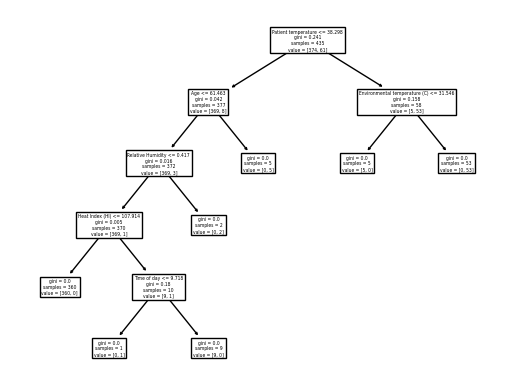

In [12]:
sklearn.tree.plot_tree(clf, feature_names=feature_names)

In [13]:
print(df.columns)
df[["Patient temperature", "Rectal temperature (deg C)"]]

Index(['Daily Ingested Water (L)', 'Time of year (month)',
       'Cardiovascular disease history', 'Dehydration', 'Heat Index (HI)',
       'Diastolic BP', 'Environmental temperature (C)',
       'Sickle Cell Trait (SCT)', 'Systolic BP', 'Weight (kg)',
       'Patient temperature', 'Rectal temperature (deg C)',
       'Relative Humidity', 'Exposure to sun', 'BMI',
       'Exertional (1) vs classic (0)', 'Barometric Pressure',
       'Heart / Pulse rate (b/min)', 'Age', 'Sweating',
       'Skin color (flushed/normal=1, pale=0.5, cyatonic=0)',
       'Strenuous exercise', 'Nationality', 'Sex', 'Hot/dry skin',
       'Time of day', 'Heat stroke'],
      dtype='object')


,Patient temperature,Rectal temperature (deg C)
10,39.608040,42.222222
11,39.114216,40.444444
12,43.186638,42.222222
13,39.444444,41.532918
14,40.000000,38.327092
...,...,...
604,36.825856,36.991501
605,37.257788,37.043312
606,36.354708,36.556138
607,34.332384,36.248820


In [15]:
df["Cardiovascular disease history"].unique()

array([0, 1], dtype=int64)